# Applied Machine Learning HW1 Tiankang Xie

In [51]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from collections import Counter
from sklearn.metrics import confusion_matrix
import random
import numpy as np

#random.seed(3)
model_nb = GaussianNB()

train = pd.read_csv("F:\SP2019\hearttrain.csv")
test = pd.read_csv("F:\SP2019\heartval.csv")
final_test = pd.read_csv("F:\SP2019\hearttest.csv")
dummy_val = pd.get_dummies(test,columns = ["2","6","12"])
dummy_train = pd.get_dummies(train, columns = ["2","6","12"])

#Using dummy variables have reduced my accuracy result. By principles of machine learning I have decided not to use dummy variable.


# Train the model using the training sets
model_nb.fit(train.iloc[:,1:13], train.iloc[:,14])

predicted_class1 = model_nb.predict(train.iloc[:,1:13])
predicted_class2 = model_nb.predict(test.iloc[:,1:13])

#display(model.theta_)
#Predict Output


def calculate_stats (predict, label):

    cm1 = confusion_matrix(predict, label)
    print('Confusion Matrix : \n', cm1)
    total1 = sum(sum(cm1))
    accuracy1 = (cm1[0, 0] + cm1[1, 1]) / total1
    print('Accuracy : ', accuracy1)
    sensitivity1 = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    print('Sensitivity : ', sensitivity1)
    specificity1 = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1])
    print('Specificity : ', specificity1)
    recall = cm1[0, 0] / (cm1[0, 0] + cm1[1, 0])
    precision = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1])
    Fscore = 2 * precision * recall / (precision + recall)
    print("F1 score : ", Fscore)
    return

#model1.predict_proba * model2.predict_proba
print("Training set:")
calculate_stats(predicted_class1,train.iloc[:,14])
print("-------------------------------------------")
print("Validation set:")
calculate_stats(predicted_class2,test.iloc[:,14])

Training set:
Confusion Matrix : 
 [[85 15]
 [12 60]]
Accuracy :  0.8430232558139535
Sensitivity :  0.85
Specificity :  0.8333333333333334
F1 score :  0.8629441624365483
-------------------------------------------
Validation set:
Confusion Matrix : 
 [[16  5]
 [ 8 15]]
Accuracy :  0.7045454545454546
Sensitivity :  0.7619047619047619
Specificity :  0.6521739130434783
F1 score :  0.7111111111111111


We frist have the formula for logistic regression: 
    $log \frac{p}{1-p} = \alpha + \sum \beta_i x_i$. The LCL function will be: $CL = \sum log ( L(\theta; y_i|x_i)) = \sum log(L(y_i|x_i;\theta)) = \sum_{y_i=1} log(p_i) + \sum_{y_i = 0} log(1-p_i)$ where log pi is equal to the probability of y being 1 and log(1-pi) is the probability of being 0. Then the MLE for LCL will just be the two terms differentiated by the parameters b_j. $\frac{d}{d b_j} \sum log p_i + \frac{d}{d b_j} \sum log (1-p_i)$ We know that $\frac{d}{d b_j} log p_i = \frac{1}{p_i} \frac{d}{d b_j} p_i$.From the formula we can derive that $p_i = \frac{1}{1+e^{-(\alpha + \sum \beta_i x_i)}}$. If we set $m = e^{-(\alpha + \sum \beta_i x_i)}$, then $p_i = \frac{1}{1+m}$ and $1-p_i = \frac{m}{1+m}$Then the previous derivative will be $\frac{d}{d b_j} p_i = -(1+m)^{-2} \frac{d}{db_j}m = -(1+m)^{-2}mx_i = p_i(1-p_i)x_i$ and thus $\frac{d}{db_j} log(p_i) = (1-p_i)x_i$. Similarly we can find $\frac{d}{d b_j} log(1-p_i) = -p_i$. Thus the overall formula for LCL is $\frac{d}{db_j}LCL = \sum_{y_i=1} (1-p_i)x_{i,j} + \sum_{y_i=0} (-p_i)x_{i,j} = \sum(y_i-p_i)x_{i,j}$. With regulation we have that 
    $\frac{d}{d_{b_j}}(L(y_i|x_i;\beta_j) + \mu \sum \beta_j^2) = (y-p)x_j + 2 \mu \beta_j$, where mu is the constraining fatcor. For each feature j, the update function is defined as $b_j := b_j + \lambda \frac{d}{b_j}LCL = b_j + \lambda (y_i-p_i)x_{i,j}$ With regularization we just add a regularization term to the end and it becomes $b_j := b_j + \lambda (y_i-p_i)x_{i,j} + 2\mu \beta_j$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide


 
lambda = 0
Confusion Matrix : 
 [[17  6]
 [ 7 14]]
Accuracy :  0.7045454545454546
Sensitivity :  0.7391304347826086
Specificity :  0.6666666666666666
F1 score :  0.723404255319149
 
lambda = 0.001
Confusion Matrix : 
 [[17  6]
 [ 7 14]]
Accuracy :  0.7045454545454546
Sensitivity :  0.7391304347826086
Specificity :  0.6666666666666666
F1 score :  0.723404255319149
 
lambda = 0.01
Confusion Matrix : 
 [[17  6]
 [ 7 14]]
Accuracy :  0.7045454545454546
Sensitivity :  0.7391304347826086
Specificity :  0.6666666666666666
F1 score :  0.723404255319149
 
lambda = 0.1
Confusion Matrix : 
 [[16  5]
 [ 8 15]]
Accuracy :  0.7045454545454546
Sensitivity :  0.7619047619047619
Specificity :  0.6521739130434783
F1 score :  0.7111111111111111
 
lambda = 1
Confusion Matrix : 
 [[ 5  0]
 [19 20]]
Accuracy :  0.5681818181818182
Sensitivity :  1.0
Specificity :  0.5128205128205128
F1 score :  0.3448275862068966


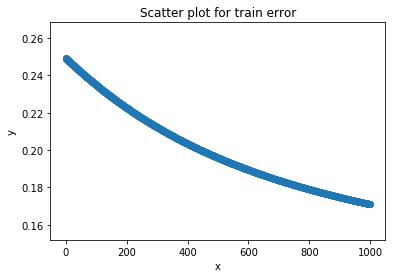

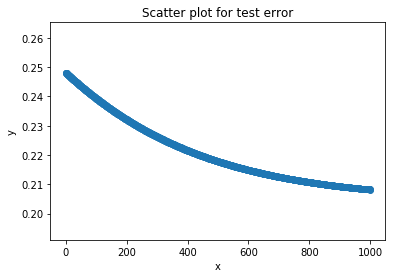

In [15]:
#random.seed(100)
#Version with SGD
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from random import shuffle
from sklearn.utils import shuffle

random.seed(300)

# Train the model using the training sets
def normalize(X): 
    ''' 
    function to normalize feature matrix, X 
    '''
    mins = np.min(X, axis = 0) 
    maxs = np.max(X, axis = 0) 
    rng = maxs - mins 
    norm_X = 1 - ((maxs - X)/rng) 
    return norm_X

train = pd.read_csv("F:\SP2019\hearttrain.csv")
test = pd.read_csv("F:\SP2019\heartval.csv")
train_x = train.iloc[:,1:13]
train_y = train.iloc[:,14]
test_x = test.iloc[:,1:13]
test_y = test.iloc[:,14]

def sigmoid(x):
    return np.where(x >= 0,
                    1 / (1 + np.exp(-x)) + 1,
                    np.exp(x) / (1 + np.exp(x)) + 1)

def logistic_regrssion(label, x, num_iter, learning_rate, lambd, ytest, xtest):
    err_vec_train = np.zeros(num_iter)
    err_vec_test = np.zeros(num_iter)
    betas = np.zeros(x.shape[1]) + 0.02
    x = normalize(x)
    xtest = normalize(xtest)
    
    for i in range(num_iter):
        idx = np.random.permutation(len(label))
        xnew,y = x.loc[idx,:], label[idx]
        #int = np.random.randint(0, len(label), 1)
        for int in range(len(label)):
            z = np.dot(xnew.loc[int,:], betas.T)
            h = sigmoid(z)
            for k in range(len(betas)):
                gradient = x.iloc[int,k] * (h - y[int])
                betas[k] -= learning_rate * (gradient - lambd*2*betas[k])

        scores = np.dot(x,betas.T)
        h = sigmoid(scores)
        output_err = h - label

        err_vec_train[i] = np.square(output_err).mean()

        scores_test = np.dot(xtest,betas.T)
        h_test = sigmoid(scores_test)
        output_err_test = ytest - h_test
        err_vec_test[i] = np.square(output_err_test).mean()

    return (betas, err_vec_train, err_vec_test)


[model,vec1,vec2] = logistic_regrssion(train_y,train_x,1000,0.0001,0,test_y,test_x)
[model2,vec12,vec22] = logistic_regrssion(train_y,train_x,1000,0.0001,0.001,test_y,test_x)
[model3,vec13,vec23] = logistic_regrssion(train_y,train_x,1000,0.0001,0.01,test_y,test_x)
[model4,vec14,vec24] = logistic_regrssion(train_y,train_x,1000,0.0001,0.1,test_y,test_x)
[model5,vec15,vec25] = logistic_regrssion(train_y,train_x,1000,0.0001,1,test_y,test_x)

pred1 = np.round(sigmoid(np.dot(normalize(test_x),model)))
pred2 = np.round(sigmoid(np.dot(normalize(test_x),model2)))
pred3 = np.round(sigmoid(np.dot(normalize(test_x),model3)))
pred4 = np.round(sigmoid(np.dot(normalize(test_x),model4)))
pred5 = np.round(sigmoid(np.dot(normalize(test_x),model5)))


print(" ")
print("lambda = 0")
calculate_stats(pred1,test_y)
print(" ")
print("lambda = 0.001")
calculate_stats(pred2,test_y)
print(" ")
print("lambda = 0.01")
calculate_stats(pred3,test_y)
print(" ")
print("lambda = 0.1")
calculate_stats(pred4,test_y)
print(" ")
print("lambda = 1")
calculate_stats(pred5,test_y)


xnum = 1000
# Plot
plt.scatter(range(xnum), vec12)
plt.title('Scatter plot for train error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.scatter(range(xnum), vec22)
plt.title('Scatter plot for test error')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


I have chosen the second model ($\lambda = 0.001$). This is because it performs decent overall in the model. To be honest the difference between 4 lambda values are minimal and the accuracy are due to chances. We do not want to overfit the model and if we choose the best one we may run the risk of overfitting. The result for the second is pretty decent. In addition the error rate for the it converges decently. In addition, the model does not have imbalanced sensitivty and specificty. Therefore considering both accuracy and overfit, I chose $\lambda = 0.001$.

In [52]:
final_test = pd.read_csv("F:\SP2019\hearttest.csv")
dummy_final_test = pd.get_dummies(final_test, columns = ["2","6","12"])

predicted_naiive = model_nb.predict(final_test.iloc[:,1:13])
print(" ")
print("Naiive Bayes")
calculate_stats(predicted_naiive,final_test.iloc[:,14])

predicted_log = np.round(sigmoid(np.dot(normalize(final_test.iloc[:,1:13]),model2)))
print(" ")
print("Logistc with best lambda")
calculate_stats(predicted_log,final_test.iloc[:,14])


 
Naiive Bayes
Confusion Matrix : 
 [[26  3]
 [ 3 22]]
Accuracy :  0.8888888888888888
Sensitivity :  0.896551724137931
Specificity :  0.88
F1 score :  0.896551724137931
 
Logistc with best lambda
Confusion Matrix : 
 [[26  4]
 [ 3 21]]
Accuracy :  0.8703703703703703
Sensitivity :  0.8666666666666667
Specificity :  0.875
F1 score :  0.8813559322033899


I think Naiive Bayes performs better than logistic regression overall. It is possible that with tuning we can achieve better result with logistic regression, however, the boring process of tuning actually reduces the utility of logistic regression. With Naiive Bayes we can achieve a decent result without tuning. Therefore Naiive Bayes is a better classifier in this context.